In [90]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv(r"C:\Users\piazz\Documents\ProjetFootPlayer\FootballPlayerStats.csv", sep = ';', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None)
football_stats = raw_data.copy()

df_football_stats = pd.DataFrame()

df_football_stats['Player'] = football_stats['Player']
df_football_stats['Player'] = df_football_stats['Player'].str.replace(' ', '-')
df_football_stats['Nation'] = football_stats['Nation']
df_football_stats['Pos'] = football_stats['Pos']
df_football_stats['SoT%'] = football_stats['SoT%']
df_football_stats['Squad'] = football_stats['Squad']
df_football_stats['Comp'] = football_stats['Comp']
df_football_stats['Age'] = football_stats['Age']
df_football_stats['MP'] = football_stats['MP']
df_football_stats['G/90'] = football_stats['Goals']
df_football_stats['G/Sh'] = football_stats['G/Sh']
df_football_stats['G/SoT'] = football_stats['G/SoT']
df_football_stats['PKGoals'] = ((football_stats['ShoPK'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PKAttempted'] = ((football_stats['PKatt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Goals'] = ((football_stats['Goals'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Pass'] = ((football_stats['PasTotAtt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PassCompleted'] = ((football_stats['PasTotCmp'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PassComp%'] = ((df_football_stats['PassCompleted'] / df_football_stats['Pass']) * 100).round(2)
df_football_stats['PasShoCmp%'] = football_stats['PasShoCmp%']
df_football_stats['PasMedCmp%'] = football_stats['PasMedCmp%']
df_football_stats['PasLonCmp%'] = football_stats['PasLonCmp%']
df_football_stats['Assist'] = ((football_stats['Assists'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Cross'] = ((football_stats['PasCrs'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['CrossCompleted'] = ((football_stats['CrsPA'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['CrossComp%'] = ((df_football_stats['CrossCompleted'] / df_football_stats['Cross']) * 100).round(2)
df_football_stats['Interception '] = football_stats['PasInt']
df_football_stats['Tackle_Won'] = ((football_stats['TklWon'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Tackle'] = ((football_stats['Tkl'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Tackle_Won%'] = ((df_football_stats['Tackle_Won'] / df_football_stats['Tackle']) * 100).round(2)
df_football_stats['SucDribble'] = ((football_stats['DriSucc'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Dribble'] = ((football_stats['DriAtt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['DribbleComp%'] = ((df_football_stats['SucDribble'] / df_football_stats['Dribble']) * 100).round(2)
df_football_stats['DribblePast%'] = ((football_stats['DriPast'] / df_football_stats['Dribble']) * 100).round(2)
df_football_stats['YCards'] = ((football_stats['CrdY'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['RCards'] = ((football_stats['CrdR'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Fls'] = ((football_stats['Fls'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Fld'] = ((football_stats['Fld'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['OGoals'] = ((football_stats['OG'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerWon'] = ((football_stats['AerWon'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerLost'] = ((football_stats['AerLost'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerWon%'] = ((football_stats['AerWon'] / (football_stats['AerWon'] + football_stats['AerLost'])) * 100).round(2)
df_football_stats['AerLost%'] = ((football_stats['AerLost'] * football_stats['AerLost']) / 90).round(0).astype(int)
df_football_stats['PasswHead'] = ((football_stats['PaswHead'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PasswHead%'] = ((df_football_stats['PasswHead'] / df_football_stats['Pass']) * 100).round(2)
df_football_stats['PKwon'] = football_stats['PKwon']

df_football_stats['Blocks'] = football_stats['Blocks']
df_football_stats['BlkSh'] = football_stats['BlkSh']
df_football_stats['BlkShSv'] = football_stats['BlkShSv']


In [91]:
## Data Milieu :
atq = df_football_stats[(df_football_stats.Pos.str.startswith('MF'))]

In [94]:
#Liste Tir
liste_quantile_ButParTir = atq['G/Sh'].quantile(np.linspace(0, 1, 100))
liste_quantile_ButParTirCadre = atq['G/SoT'].quantile(np.linspace(0, 1, 100))
liste_quantile_ButPar90min = atq['G/90'].quantile(np.linspace(0, 1, 100))

#Liste Tete
liste_quantile_TeteReussi = atq['AerWon%'].quantile(np.linspace(0, 1, 100))
liste_quantile_PasseAvecTete = atq['PasswHead%'].quantile(np.linspace(0, 1, 100))

#Liste Passe
liste_quantile_PassShortComp = atq['PasShoCmp%'].quantile(np.linspace(0, 1, 100))
liste_quantile_PassMediumComp = atq['PasMedCmp%'].quantile(np.linspace(0, 1, 100))
liste_quantile_PassLongComp = atq['PasLonCmp%'].quantile(np.linspace(0, 1, 100))

#Liste Dribble
liste_quantile_DribbleComp = atq['DribbleComp%'].quantile(np.linspace(0, 1, 100))
liste_quantile_DribblePast = atq['DribblePast%'].quantile(np.linspace(0, 1, 100))

#Liste Blocks
liste_quantile_Block = atq['Blocks'].quantile(np.linspace(0, 1, 100))
liste_quantile_BlockTir = atq['BlkSh'].quantile(np.linspace(0, 1, 100))
liste_quantile_BlockPasse = atq['BlkShSv'].quantile(np.linspace(0, 1, 100))

#Liste Tacles
liste_quantile_Fautes = atq['Fls'].quantile(np.linspace(0, 1, 100))
liste_quantile_tacle_gagne = atq['Tackle_Won'].quantile(np.linspace(0, 1, 100))
liste_quantile_carton_rouge = atq['RCards'].quantile(np.linspace(0, 1, 100))
liste_quantile_carton_jaune = atq['YCards'].quantile(np.linspace(0, 1, 100))

In [95]:
#Attribution des points
def calc_quantile(value,liste_quantile):
    for idx2, value_quantile in enumerate(liste_quantile):
        if value < value_quantile:
            return idx2
    return 100

In [96]:
#Calcul score Tir
atq["but_par_tir"] = atq['G/Sh'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTir))
atq["but_par_tir_cadre"] = atq['G/SoT'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTirCadre))
atq["but_par_90min"] = atq['G/90'].apply(lambda row: calc_quantile(row, liste_quantile_ButPar90min))

#Calcul Score Tete
atq["tete_reussi"]=atq['AerWon%'].apply(lambda row: calc_quantile(row,liste_quantile_TeteReussi))
atq["passe_avec_tete"]=atq['PasswHead%'].apply(lambda row: calc_quantile(row,liste_quantile_PasseAvecTete))

#Calcul Score Passe
atq["pass_short_comp"]=atq['PasShoCmp%'].apply(lambda row: calc_quantile(row,liste_quantile_PassShortComp))
atq["pass_medium_comp"]=atq['PasMedCmp%'].apply(lambda row: calc_quantile(row,liste_quantile_PassMediumComp))
atq["pass_long_comp"]=atq['PasLonCmp%'].apply(lambda row: calc_quantile(row,liste_quantile_PassLongComp))

#Calcul Score Dribble
atq["Dribbles_reussis"]=atq['DribbleComp%'].apply(lambda row: calc_quantile(row,liste_quantile_DribbleComp))
atq["Dribles_passes"]=atq['DribblePast%'].apply(lambda row: calc_quantile(row,liste_quantile_DribblePast))

#Calcul Score Blocks
atq["BlockPasse"]=atq['BlkShSv'].apply(lambda row: calc_quantile(row,liste_quantile_BlockPasse))
atq["BlockTir"]=atq['BlkSh'].apply(lambda row: calc_quantile(row,liste_quantile_BlockTir))
atq["Block"]=atq['Blocks'].apply(lambda row: calc_quantile(row,liste_quantile_Block))

#Calcul score Tacle
atq["fautes"]=atq['Fls'].apply(lambda row: calc_quantile(row,liste_quantile_Fautes))
atq["tacles_gagnes"]=atq['Tackle_Won'].apply(lambda row: calc_quantile(row,liste_quantile_tacle_gagne))
atq["carton_rouge"]=atq['RCards'].apply(lambda row: calc_quantile(row,liste_quantile_carton_rouge))
atq["carton_jaune"]=atq['YCards'].apply(lambda row: calc_quantile(row,liste_quantile_carton_jaune))

C:\Users\piazz\AppData\Local\Temp\ipykernel_13220\1553247046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["but_par_tir"] = atq['G/Sh'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTir))
C:\Users\piazz\AppData\Local\Temp\ipykernel_13220\1553247046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["but_par_tir_cadre"] = atq['G/SoT'].apply(lambda row: calc_quantile(row, liste_quantile_ButParTirCadre))
C:\Users\piazz\AppData\Local\Temp\ipykernel_13220\1553247046.py:4: SettingWithCo

In [97]:
def calculate_score(row, list_features:list):
    coef = min(0.5 + 0.5 * (row["MP"] / 30), 1)
    score = row[list_features].sum() / len(list_features)
    return round(score * coef)

In [98]:
## Notes par stats 
atq["Tir"]=atq.apply(lambda row: calculate_score(row,["but_par_tir_cadre","but_par_tir","but_par_90min"]), axis=1)
atq["Tete"]=atq.apply(lambda row:calculate_score(row,["tete_reussi" , "passe_avec_tete"]) , axis=1)
atq["Passe"]=atq.apply(lambda row:calculate_score(row,["pass_short_comp","pass_medium_comp","pass_long_comp"]), axis=1)
atq["Dribbles"]=atq.apply(lambda row:calculate_score(row,["Dribbles_reussis","Dribles_passes"]), axis=1)
atq["Block"]=atq.apply(lambda row:calculate_score(row,["BlockPasse" , "BlockTir", "Block"]) , axis=1)
atq["Tacle"]=atq.apply(lambda row:calculate_score(row,["fautes","tacles_gagnes","carton_rouge","carton_jaune"]), axis=1)

##Note finale 
atq["Note Finale"] = round((atq[["Tir", "Passe", "Dribbles", "Block"]].mean(axis=1)))

C:\Users\piazz\AppData\Local\Temp\ipykernel_13220\4034356102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["Tir"]=atq.apply(lambda row: calculate_score(row,["but_par_tir_cadre","but_par_tir","but_par_90min"]), axis=1)
C:\Users\piazz\AppData\Local\Temp\ipykernel_13220\4034356102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atq["Tete"]=atq.apply(lambda row:calculate_score(row,["tete_reussi" , "passe_avec_tete"]) , axis=1)
C:\Users\piazz\AppData\Local\Temp\ipykernel_13220\4034356102.py:4: Sett

In [100]:
Stats_milieu = atq
#Stats_milieu = atq.drop(columns=["G/90","G/Sh","G/SoT","PKAttempted","Pass","PassCompleted","PassComp%","PasShoCmp%","PasMedCmp%","PasLonCmp%","Assist","Cross","CrossCompleted","CrossComp%","Tackle_Won","SucDribble","Dribble","DribbleComp%","YCards","RCards","Fls","Fld","OGoals","AerWon","AerLost","AerWon%","AerLost","AerLost%","PasswHead","PasswHead%","PKwon","but_par_tir","but_par_tir_cadre","but_par_90min","BlockPasse","BlockTir","pass_short_comp","pass_medium_comp","pass_long_comp","DribblePast%","Dribbles_reussis","Dribles_passes","Tackle","Tackle_Won%","Blocks","BlkSh","BlkShSv"])

In [101]:
Stats_milieu.sort_values('Note Finale', ascending = False).head(20)

,Player,Nation,Pos,SoT%,Squad,Comp,Age,MP,G/90,G/Sh,G/SoT,PKGoals,PKAttempted,Goals,Pass,PassCompleted,PassComp%,PasShoCmp%,PasMedCmp%,PasLonCmp%,Assist,Cross,CrossCompleted,CrossComp%,Interception,Tackle_Won,Tackle,Tackle_Won%,SucDribble,Dribble,DribbleComp%,DribblePast%,YCards,RCards,Fls,Fld,OGoals,AerWon,AerLost,AerWon%,AerLost%,PasswHead,PasswHead%,PKwon,Blocks,BlkSh,BlkShSv,but_par_tir,but_par_tir_cadre,but_par_90min,tete_reussi,passe_avec_tete,pass_short_comp,pass_medium_comp,pass_long_comp,Dribbles_reussis,Dribles_passes,BlockPasse,BlockTir,Block,fautes,tacles_gagnes,carton_rouge,carton_jaune,Tir,Tete,Passe,Dribbles,Tacle,Note Finale
1541,Manuel-Locatelli,ITA,MF,14.3,Juventus,Serie A,24.0,31,0.13,0.14,1.00,0,0,3,1442,1238,85.85,89.3,90.1,74.0,3,8,1,12.50,1.67,31,46,67.39,16,20,80.00,3.35,6,0,42,29,0,35,26,57.48,0,24,1.66,0.00,2.21,0.96,0.04,87,99,74,80,17,67,77,75,92,40,97,97,93,85,79,88,86,87,48,73,66,84,80.0
538,Pathé-Ciss,SEN,MF,25.0,Rayo Vallecano,La Liga,28.0,31,0.16,0.10,0.40,0,0,2,535,446,83.36,88.1,89.8,72.4,1,0,0,NaN,1.64,19,33,57.58,9,12,75.00,6.17,5,0,20,14,1,37,25,59.65,0,27,5.05,0.00,2.13,0.66,0.00,77,81,78,84,71,60,74,72,88,65,95,93,91,54,61,88,80,79,78,69,76,71,79.0
1844,Manu-Morlanes,ESP,MF,25.0,Espanyol,La Liga,23.0,27,0.16,0.25,1.00,0,0,2,644,563,87.42,93.6,92.5,61.8,0,5,2,40.00,1.02,20,30,66.67,11,13,84.62,6.69,6,1,16,15,0,22,24,47.79,0,22,3.42,0.00,1.73,0.39,0.00,97,99,78,59,48,90,87,46,93,68,95,79,76,46,62,99,86,87,51,71,76,70,78.0
2651,Khéphren-Thuram-Ulie,FRA,MF,26.1,Nice,Ligue 1,21.0,36,0.19,0.17,0.67,0,0,4,1143,991,86.70,90.7,91.7,73.4,2,9,1,11.11,1.28,26,43,60.47,26,39,66.67,3.41,4,0,35,20,0,18,20,47.22,0,33,2.89,0.05,1.85,0.52,0.05,91,95,83,57,38,76,84,74,77,41,98,87,86,77,73,88,73,90,48,78,59,78,78.0
1754,Thiago-Mendes,BRA,MFDF,25.0,Lyon,Ligue 1,30.0,29,0.10,0.13,0.50,0,0,2,1561,1377,88.21,92.4,94.2,73.2,1,3,0,0.00,1.45,32,45,71.11,8,8,100.00,4.88,3,1,25,15,0,22,24,47.75,0,53,3.40,0.00,1.26,0.29,0.00,84,91,68,58,47,85,91,74,100,56,95,69,67,63,81,99,64,80,52,82,77,75,76.0
843,Fabinho,BRA,MF,36.8,Liverpool,Premier League,28.0,29,0.19,0.16,0.43,2,2,5,1522,1342,88.17,90.3,91.8,76.1,1,6,1,16.67,0.93,37,57,64.91,8,11,72.73,2.82,7,0,49,39,0,45,28,61.62,0,76,4.99,0.00,1.98,0.39,0.00,89,83,83,86,71,74,84,81,85,31,95,79,83,91,87,88,89,84,77,78,57,87,76.0
1502,Mario-Lemina,GAB,MF,25.0,Nice,Ligue 1,28.0,32,0.09,0.13,0.50,0,0,2,1191,1051,88.25,89.8,93.7,74.6,0,6,1,16.67,1.10,44,71,61.97,24,32,75.00,3.44,7,1,39,27,0,28,13,68.45,0,30,2.52,0.00,1.51,0.37,0.05,84,91,66,93,30,71,90,77,88,42,98,76,76,82,93,99,89,80,62,79,65,91,75.0
2783,Arturo-Vidal,CHI,MF,50.0,Inter,Serie A,35.0,28,0.12,0.06,0.11,0,0,1,585,515,88.03,92.8,89.6,71.3,1,5,2,40.00,2.07,20,35,57.14,6,7,85.71,10.43,3,0,20,11,0,14,14,50.00,0,25,4.27,0.00,1.71,0.61,0.00,63,53,72,69,61,87,73,69,94,77,95,91,81,54,62,88,64,61,63,74,83,65,75.0
1369,Franck-Kessié,CIV,MF,25.0,Milan,Serie A,25.0,31,0.23,0.13,0.50,2,3,6,1331,1164,87.45,91.0,90.7,74.9,0,10,4,40.00,1.17,34,52,65.38,23,34,67.65,3.00,2,0,38,35,0,36,35,50.72,0,42,3.16,0.04,1.76,0.35,0.00,84,91,87,69,43,78,79,77,78,34,95,75,79,81,84,88,53,87,56,78,56,76,75.0
2331,Fabián-Ruiz-Peña,ESP,MF,32.5,Napoli,Serie A,26.0,32,0.26,0.18,0.54,0,0,7,2199,1971,89.63,92.4,91.8,83.2,4,15,4,26.67,2.45,41,55,74.55,13,17,76.47,2.88,2,0,21,24,0,14,17,45.30,0,39,1.77,0.00,1.47,0.08,0.00,92,92,90,52,18,85,84,91,89,31,95,37,61,55,90,88,53,91,35,87,60,72,75.0


In [102]:
csv_milieu_final = Stats_milieu.sort_values('Note Finale', ascending = False).head(20)

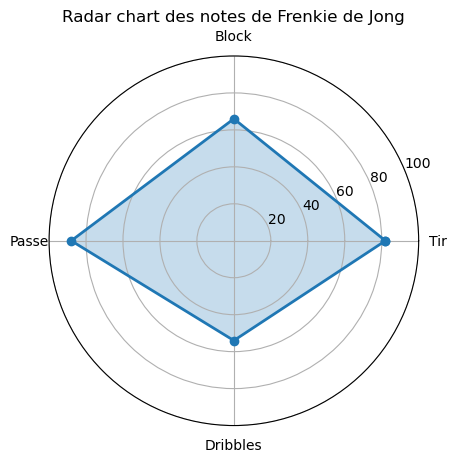

In [34]:
import matplotlib.pyplot as plt
from math import pi

# Sélectionner les notes de Robert
jong = Stats_milieu[(Stats_milieu.Player == "Frenkie de Jong")]

# Créer une liste avec les noms des notes
categories = ['Tir', 'Block', 'Passe', 'Dribbles']

# Créer une liste avec les valeurs de chaque note, normalisées sur une échelle de 0 à 100
values = jong.loc[:, categories].values.tolist()[0]

# Ajouter la première valeur à la fin de la liste pour fermer le graphique
values += values[:1]

# Créer un array avec les angles de chaque axe
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Initialiser le graphique en polar
ax = plt.subplot(111, polar=True)

# Dessiner le polygone en utilisant les valeurs et les angles
ax.plot(angles, values, 'o-', linewidth=2)

# Remplir le polygone avec une couleur transparente
ax.fill(angles, values, alpha=0.25)

# Ajouter des labels aux axes
ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], categories)

# Définir la limite maximale des axes à 100
ax.set_ylim([0, 100])

# Afficher le titre du graphique avec le nom de Robert
plt.title("Radar chart des notes de Frenkie de Jong")

# Afficher le graphique
plt.show()

In [103]:
# trier le dataframe par équipe et note
csv_milieu_final = Stats_milieu.sort_values(['Squad', 'Note Finale'], ascending=False)

# ajouter une colonne pour la note attribuée pour chaque joueur
csv_milieu_final['classement_equipe'] = 0

# attribuer les notes pour chaque joueur en fonction de son équipe
for equipe in csv_milieu_final['Squad'].unique():
    equipe_df = csv_milieu_final[csv_milieu_final['Squad'] == equipe]
    i = 1
    for index, row in equipe_df.iterrows():
        csv_milieu_final.at[index, 'classement_equipe'] = i
        i += 1


In [104]:
# Exporter le dataframe en CSV
csv_milieu_final.sort_values('Note Finale', ascending = False).to_csv('NotesMil.csv', index=False)